# Retriveing GOOGLE stock data using Unibit API

In [3]:
#Source code from https://github.com/unibit-api/unibit-examples/blob/master/Stock_data_prediction.ipynb
import requests
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
import statistics
API_KEY = "d_v5YPSjHhQcqdhAh6qPBtem04VlUZ-w"

In [4]:
def getIntraDayByTicker(Ticker):
    """ This function takes as an input ticker symbole
    and returns intraday stock price as an object"""
    import requests
    import json
    response = requests.get('https://api.unibit.ai/realtimestock/'+Ticker+'?AccessKey='+API_KEY)
    data_str = response.text
    parsed_data = json.loads(data_str)
    return parsed_data

In [5]:
def getStockNewsByTicker(Ticker):
    """ This function takes as an input ticker symbole
    and returns Latest stock news data array"""
    import requests
    import json
    response = requests.get('https://api.unibit.ai/news/latest/'+Ticker+'?AccessKey='+API_KEY)
    data_str = response.text
    parsed_data = json.loads(data_str)
    return parsed_data

In [6]:
def getHistoricalPrice(Ticker,rng,interval):
    """ This function takes as an input ticker symbole, range as rng and interval
    and returns historical stock price as object
    Possible ranges : 1m - 3m - 1y - 3y - 5y - 10y - 20y
    A positive number (n). If passed, chart data will return every nth element as defined by Interval"""
    import requests
    import json
    response = requests.get('https://api.unibit.ai/historicalstockprice/'+Ticker+'?range='+rng+'&interval='+str(interval)+'&AccessKey='+API_KEY)
    data_str = response.text
    parsed_data = json.loads(data_str)
    return parsed_data

# Retriving  real-time stock data of GOOGLE 
## Way 1

In [7]:
GOOGL_intra = pd.DataFrame(data = getIntraDayByTicker("GOOGL"))

In [8]:
GOOGL_intra.head(20)

,date,minute,price,ticker
0,20190405,15:59,1211.12,GOOGL
1,20190405,15:58,1210.29,GOOGL
2,20190405,15:56,1211.16,GOOGL
3,20190405,15:54,1210.54,GOOGL
4,20190405,15:53,1210.67,GOOGL
5,20190405,15:51,1211.79,GOOGL
6,20190405,15:49,1212.85,GOOGL
7,20190405,15:47,1213.38,GOOGL
8,20190405,15:46,1213.45,GOOGL
9,20190405,15:45,1213.65,GOOGL


In [9]:
GOOGL_intra["time_index"] = pd.to_datetime((GOOGL_intra['date'] + GOOGL_intra["minute"]).values, format='%Y%m%d%H:%M')
GOOGL_intra.set_index("time_index",inplace=True)
# AAPL_intra["time_index"] = pd.to_datetime((AAPL_intra['date'] + AAPL_intra["minute"]).values, format='%Y%m%d%H:%M')
# AAPL_intra.set_index("time_index",inplace=True)

# Visualizing the real-time stock price of GOOGLE

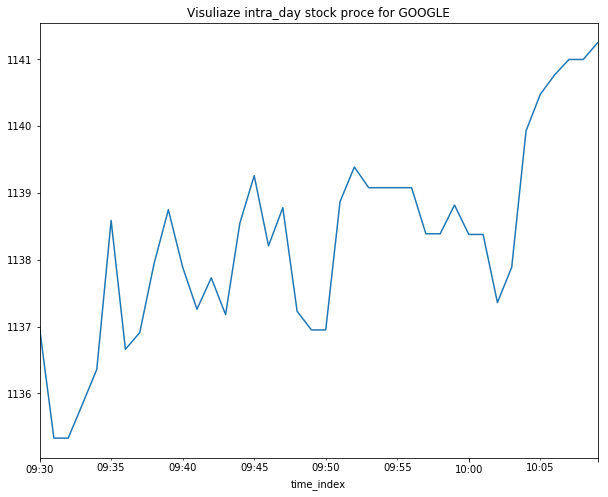

In [187]:
GOOGL_intra.tail(40).price.plot(figsize=[10,8], title = 'Visuliaze intra_day stock proce for GOOGLE')

# Retriving  historical stock data of GOOGLE 

In [209]:
GOOGL_hist = pd.DataFrame(data = getHistoricalPrice(Ticker='GOOGL',rng="1y",interval=2)["Stock price"])
GOOGL_hist.date = pd.to_datetime(GOOGL_hist.date)
GOOGL_hist.set_index("date",inplace=True)

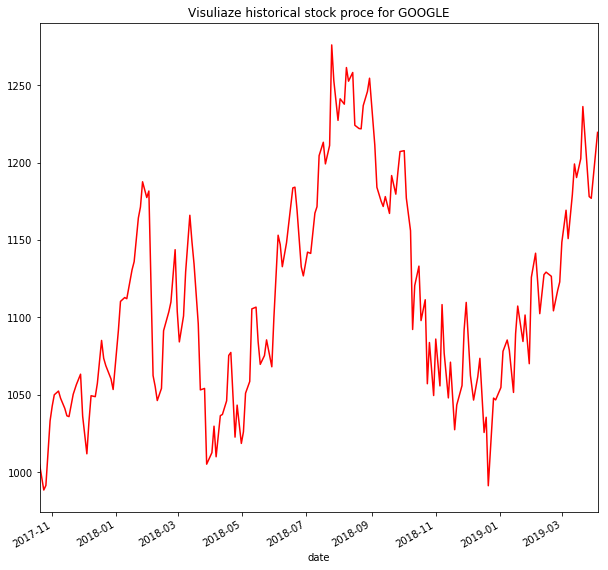

In [189]:
GOOGL_hist.close.plot(figsize=[10,10], color='red', title = 'Visuliaze historical stock proce for GOOGLE')

In [190]:
GOOGL_hist.describe()

,adj_close,close,high,low,open,volume
count,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02
mean,1113.734973,1113.734973,1124.737486,1101.287268,1113.375956,1.906879e+06
std,68.211097,68.211097,66.630980,68.809292,67.732633,8.350407e+05
min,988.490000,988.490000,989.260000,977.080000,986.500000,7.761110e+05
25%,1055.045000,1055.045000,1067.540000,1043.935000,1055.490000,1.379511e+06
50%,1103.920000,1103.920000,1116.290000,1093.880000,1105.570000,1.719900e+06
75%,1170.290000,1170.290000,1180.175000,1156.300000,1160.250000,2.241150e+06
max,1275.940000,1275.940000,1291.440000,1252.120000,1289.120000,6.411000e+06


# Visualizing historical stock data of GOOGLE 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

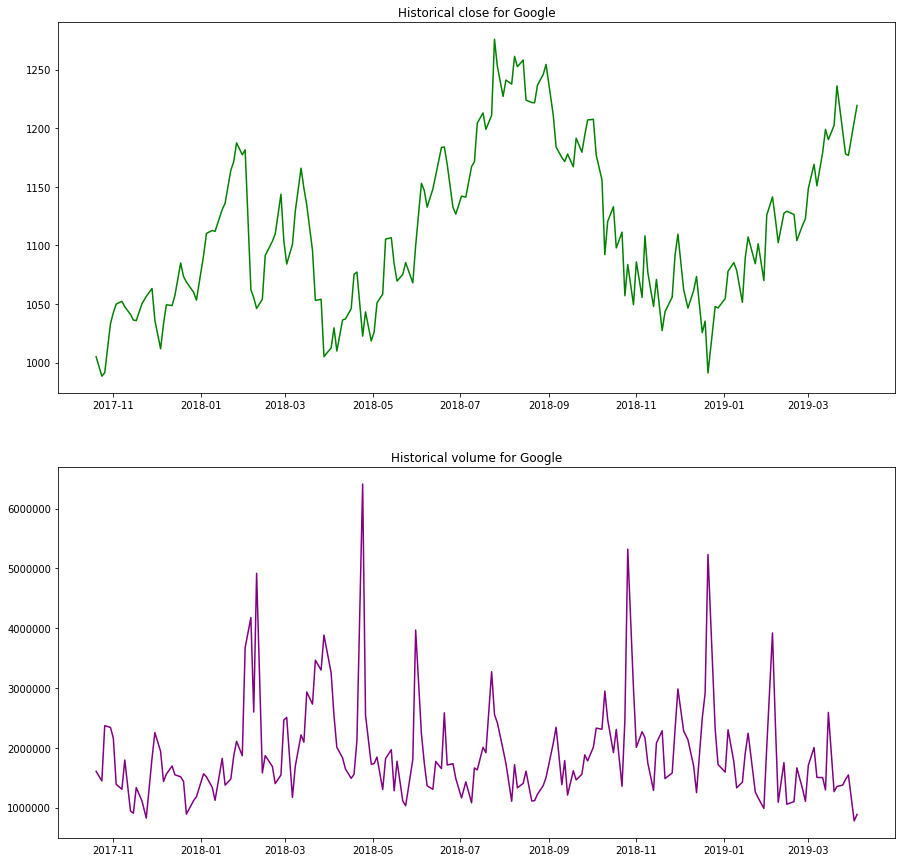

In [204]:
plt.figure(figsize=[15,15])
ax1 = plt.subplot(211)
plt.title('Historical close for Google')
plt.plot(GOOGL_hist.close, color = 'green')
plt.setp(ax1.get_xticklabels(), fontsize=10)
ax2 = plt.subplot(212)
plt.title('Historical volume for Google')
plt.plot(GOOGL_hist.volume, color = 'purple')
plt.setp(ax2.get_xticklabels(), fontsize=10)

In [203]:
from unibit.stockprice import StockPrice
sp = StockPrice(key="d_v5YPSjHhQcqdhAh6qPBtem04VlUZ-w")
aapl_price_csv = sp.getPricesRealTime("GOOGL", size=20, datatype="csv")

In [81]:
import csv
result = {}
for item in aapl_price_csv:
    print(item)

['date', 'minute', 'price']
['20190405', '15:08', '1214.28']
['20190405', '15:06', '1214.35']
['20190405', '15:04', '1214.04']
['20190405', '15:02', '1214.02']
['20190405', '15:01', '1213.62']
['20190405', '15:00', '1213.62']
['20190405', '14:59', '1213.45']
['20190405', '14:57', '1213.45']
['20190405', '14:56', '1213.27']
['20190405', '14:55', '1213.27']
['20190405', '14:54', '1213.34']
['20190405', '14:52', '1212.45']
['20190405', '14:51', '1212.45']
['20190405', '14:49', '1212.58']
['20190405', '14:47', '1212.79']
['20190405', '14:46', '1212.79']
['20190405', '14:45', '1212.79']
['20190405', '14:44', '1213.04']
['20190405', '14:42', '1213.04']
['20190405', '14:41', '1213.0']


In [82]:
from unibit.companyinfo import CompanyInfo
ci = CompanyInfo(key="d_v5YPSjHhQcqdhAh6qPBtem04VlUZ-w")
aapl_profile = ci.getCompanyProfile("AAPL")
aapl_profile

{'ticker': 'AAPL',
 'company_name': 'Apple Inc.',
 'exchange': 'Nasdaq Global Select',
 'industry': 'Computer Hardware',
 'website': 'http://www.apple.com',
 'company_decription': 'Apple Inc is designs, manufactures and markets mobile communication and media devices and personal computers, and sells a variety of related software, services, accessories, networking solutions and third-party digital content and applications.',
 'company_leadership': 'Timothy D. Cook',
 'sector': 'Technology',
 'asset_type': 'cs'}